## Visualization for feature map

This is a script to show feature maps

本脚本用于展示如何可视化特征图

In [1]:
import os
import sys

import cv2
import torch
from matplotlib import pyplot as plt

os.chdir(os.path.dirname(os.path.abspath(".")))
sys.path.insert(0, os.path.dirname(os.path.abspath(".")))

from configs.salience_detr.salience_detr_resnet50_800_1333 import model
from util.utils import load_state_dict

c:\Users\WE\miniconda3\envs\salience_detr\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\WE\Desktop\Salience-DETR\models\bricks\ms_deform_attn.py:26: UserWarning: No cuda is available, skip loading MultiScaleDeformableAttention C++ extention
  warnings.warn("No cuda is available, skip loading MultiScaleDeformableAttention C++ extention")


In [2]:
# load model state dict and set to eval mode
weight = torch.load("salience_detr_resnet50_800_1333_coco_2x.pth", map_location="cpu")
load_state_dict(model, weight)
model = model.eval()

In [3]:
# prepare input image
image_name = "data/coco/val2017/000000000139.jpg"
save_name = image_name.replace(".jpg", ".pth")
image = cv2.imread(image_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_tensor = torch.tensor(image).permute(2, 0, 1)

In [4]:
# define a forward hook, which saves the output tensor after the forward pass
# for image.jpg, the output tensor will be saved to image.pth
def save_output_hook(module, input, output):
    torch.save(output, save_name)

In [5]:
# register the forward hook and save the medium feature map
hook = model.backbone.register_forward_hook(save_output_hook)
model([image_tensor])
hook.remove()  # remove the hook after the forward pass

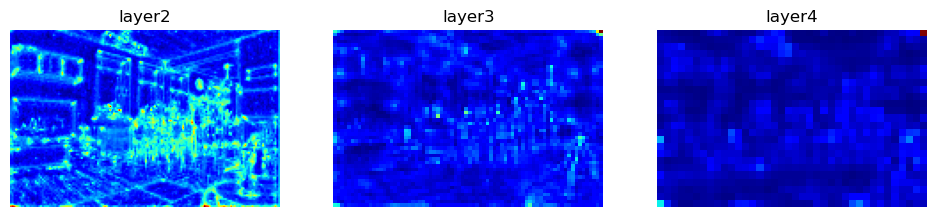

In [6]:
# load the saved feature map and perform visualization
multi_level_features = torch.load(save_name)
plt.figure(figsize=(16, 4))
for key, value in multi_level_features.items():
    feat_for_show = value[0].mean(0).detach()
    plt.subplot(1, 4, int(key[-1]))
    plt.imshow(feat_for_show, cmap="jet")
    plt.title(key)
    plt.axis("off")